In [1]:
library(Seurat)
# library(SeuratDisk)
library(ggplot2)
library(patchwork)

## load in EUS-FNB

In [129]:
data_dir = "../data/pdac"
# samples = list.files(path = data_dir)
samples = c('wu01', 'wu02', 'wu03', 'wu04', 'wu05', 'wu07', 'wu09', 'wu14', 'wu15', 'wu16', 'wu18', 'wu22',
           'wu23', 'wu24', 'wu25', 'wu26', 'wu27', 'wu28', 'wu29', 'wu30', 'wu31', 'wu32')
fps = c()
for (sample in samples) {
  
  fps = c(fps, paste(data_dir, sample, sep="/"))   
  
}
fps

[1] "../data/pdac/wu01" "../data/pdac/wu02" "../data/pdac/wu03"
 [4] "../data/pdac/wu04" "../data/pdac/wu05" "../data/pdac/wu07"
 [7] "../data/pdac/wu09" "../data/pdac/wu14" "../data/pdac/wu15"
[10] "../data/pdac/wu16" "../data/pdac/wu18" "../data/pdac/wu22"
[13] "../data/pdac/wu23" "../data/pdac/wu24" "../data/pdac/wu25"
[16] "../data/pdac/wu26" "../data/pdac/wu27" "../data/pdac/wu28"
[19] "../data/pdac/wu29" "../data/pdac/wu30" "../data/pdac/wu31"
[22] "../data/pdac/wu32"

In [130]:
objs = c()
for (i in 1:length(fps)) {
  print(fps[[i]])
  temp.data = Read10X(data.dir = fps[[i]])
  temp = CreateSeuratObject(counts = temp.data, project = samples[[i]], min.cells = 3, min.features = 200)
  objs = c(objs, temp)
}
pdac_eus <- merge(objs[[1]], y = objs[2:length(objs)], add.cell.ids = samples, project = "pdac_eus")

[1] "../data/pdac/wu01"
[1] "../data/pdac/wu02"
[1] "../data/pdac/wu03"
[1] "../data/pdac/wu04"
[1] "../data/pdac/wu05"
[1] "../data/pdac/wu07"
[1] "../data/pdac/wu09"
[1] "../data/pdac/wu14"
[1] "../data/pdac/wu15"
[1] "../data/pdac/wu16"
[1] "../data/pdac/wu18"
[1] "../data/pdac/wu22"
[1] "../data/pdac/wu23"
[1] "../data/pdac/wu24"
[1] "../data/pdac/wu25"
[1] "../data/pdac/wu26"
[1] "../data/pdac/wu27"
[1] "../data/pdac/wu28"
[1] "../data/pdac/wu29"
[1] "../data/pdac/wu30"
[1] "../data/pdac/wu31"
[1] "../data/pdac/wu32"


In [131]:
pdac_eus[["percent.mt"]] <- PercentageFeatureSet(pdac_eus, pattern = "^MT-")

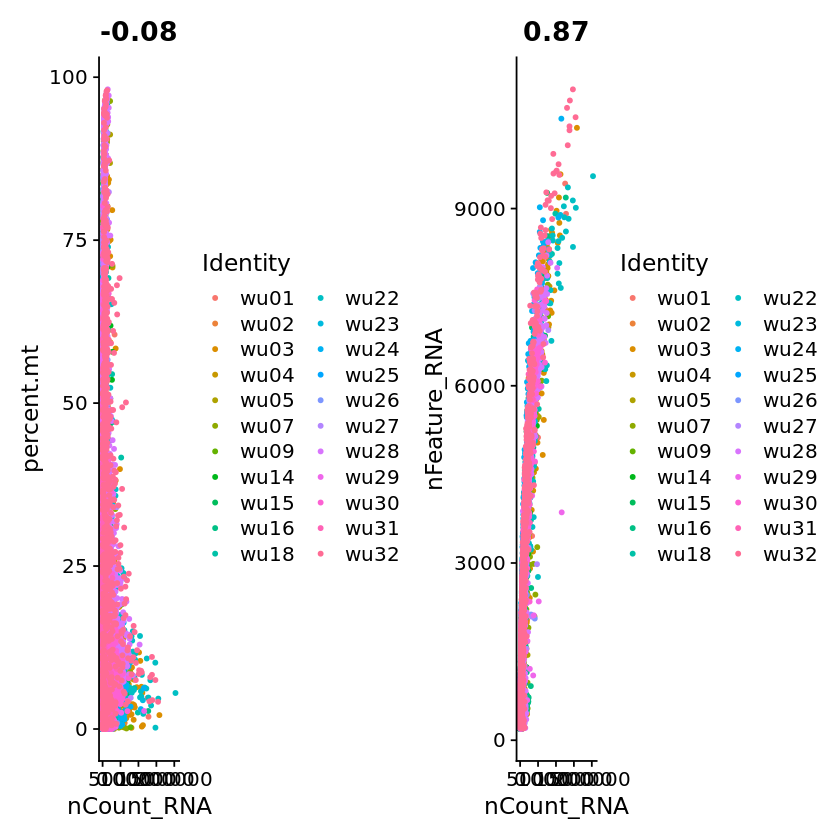

In [132]:
plot1 <- FeatureScatter(pdac_eus, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pdac_eus, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [133]:
pdac_eus <- subset(pdac_eus, subset = nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 20)

In [134]:
pdac_eus

An object of class Seurat 
22833 features across 24154 samples within 1 assay 
Active assay: RNA (22833 features, 0 variable features)

## load in reference dataset (HTAN)

In [135]:
data_dir = "../data/pdac"
# samples = list.files(path = data_dir)
samples = c('1555-tumor',
 'H_ZY-1105-07',
 'H_ZY-1160-06',
 'H_ZY-1174-06',
 'TWCE-HT055P-S1PAG',
 'TWCE-HT081P1-XB1')
fps = c()
for (sample in samples) {
  
  fps = c(fps, paste(data_dir, sample, sep="/"))   
  
}
fps

[1] "../data/pdac/1555-tumor"        "../data/pdac/H_ZY-1105-07"     
[3] "../data/pdac/H_ZY-1160-06"      "../data/pdac/H_ZY-1174-06"     
[5] "../data/pdac/TWCE-HT055P-S1PAG" "../data/pdac/TWCE-HT081P1-XB1"

In [136]:
objs = c()
for (i in 1:length(fps)) {
  print(fps[[i]])
  temp.data = Read10X(data.dir = fps[[i]])
  temp = CreateSeuratObject(counts = temp.data, project = samples[[i]], min.cells = 3, min.features = 200)
  objs = c(objs, temp)
}
pdac_htan <- merge(objs[[1]], y = objs[2:length(objs)], add.cell.ids = samples, project = "pdac_htan")

[1] "../data/pdac/1555-tumor"
[1] "../data/pdac/H_ZY-1105-07"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/pdac/H_ZY-1160-06"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/pdac/H_ZY-1174-06"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/pdac/TWCE-HT055P-S1PAG"
[1] "../data/pdac/TWCE-HT081P1-XB1"


In [137]:
pdac_htan

An object of class Seurat 
26954 features across 34787 samples within 1 assay 
Active assay: RNA (26954 features, 0 variable features)

In [138]:
pdac_htan[["percent.mt"]] <- PercentageFeatureSet(pdac_htan, pattern = "^MT-")

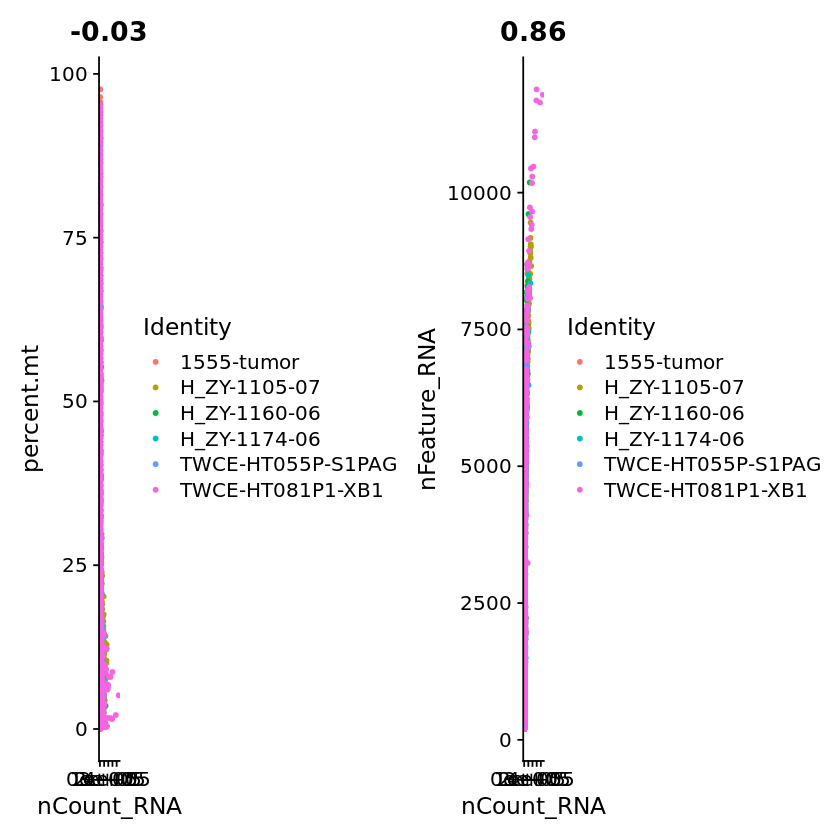

In [139]:
plot1 <- FeatureScatter(pdac_htan, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pdac_htan, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [140]:
pdac_htan <- subset(pdac_htan, subset = nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 20)

In [141]:
data_dir = "../data/chan-seng-yue/h5"
# samples = list.files(path = data_dir)
samples = c('100070_filtered_gene_bc_matrices_h5.h5', '91412_filtered_gene_bc_matrices_h5.h5', '95373_filtered_gene_bc_matrices_h5.h5',
'85948_filtered_gene_bc_matrices_h5.h5', '91610_filtered_gene_bc_matrices_h5.h5', '96460_filtered_gene_bc_matrices_h5.h5',
'87235_filtered_gene_bc_matrices_h5.h5', '91706_filtered_gene_bc_matrices_h5.h5', '97727_filtered_gene_bc_matrices_h5.h5',
'87784_filtered_gene_bc_matrices_h5.h5', '94930_filtered_gene_bc_matrices_h5.h5', 'COMP_0158_P_filtered_gene_bc_matrices_h5.h5',
'90209_CMP_filtered_gene_bc_matrices_h5.h5', '95092_filtered_gene_bc_matrices_h5.h5', 'G9903_filtered_gene_bc_matrices_h5.h5')
fps = c()
for (sample in samples) {
  
  fps = c(fps, paste(data_dir, sample, sep="/"))   
  
}
fps

[1] "../data/chan-seng-yue/h5/100070_filtered_gene_bc_matrices_h5.h5"     
 [2] "../data/chan-seng-yue/h5/91412_filtered_gene_bc_matrices_h5.h5"      
 [3] "../data/chan-seng-yue/h5/95373_filtered_gene_bc_matrices_h5.h5"      
 [4] "../data/chan-seng-yue/h5/85948_filtered_gene_bc_matrices_h5.h5"      
 [5] "../data/chan-seng-yue/h5/91610_filtered_gene_bc_matrices_h5.h5"      
 [6] "../data/chan-seng-yue/h5/96460_filtered_gene_bc_matrices_h5.h5"      
 [7] "../data/chan-seng-yue/h5/87235_filtered_gene_bc_matrices_h5.h5"      
 [8] "../data/chan-seng-yue/h5/91706_filtered_gene_bc_matrices_h5.h5"      
 [9] "../data/chan-seng-yue/h5/97727_filtered_gene_bc_matrices_h5.h5"      
[10] "../data/chan-seng-yue/h5/87784_filtered_gene_bc_matrices_h5.h5"      
[11] "../data/chan-seng-yue/h5/94930_filtered_gene_bc_matrices_h5.h5"      
[12] "../data/chan-seng-yue/h5/COMP_0158_P_filtered_gene_bc_matrices_h5.h5"
[13] "../data/chan-seng-yue/h5/90209_CMP_filtered_gene_bc_matrices_h5.h5"  
[14] "../data/chan-seng-yue/h5/95092_filtered_gene_bc_matrices_h5.h5"      
[15] "../data/chan-seng-yue/h5/G9903_filtered_gene_bc_matrices_h5.h5"

In [142]:
objs = c()
for (i in 1:length(fps)) {
  print(fps[[i]])
  temp.data = Read10X_h5(filename = fps[[i]])
  temp = CreateSeuratObject(counts = temp.data,
                            project = gsub(gsub(samples[[i]], pattern="_filtered_gene_bc_matrices_h5.h5", replacement=""),
                                             pattern="../data/chan-seng-yue/h5/", replacement=""),
                            min.cells = 3, min.features = 200)
  objs = c(objs, temp)
}
chan_seng_yue <- merge(objs[[1]], y = objs[2:length(objs)], add.cell.ids = samples, project = "chan-seng-yue")

[1] "../data/chan-seng-yue/h5/100070_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/91412_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/95373_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/85948_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/91610_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/96460_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/87235_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/91706_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/97727_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/87784_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/94930_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/COMP_0158_P_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/90209_CMP_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/95092_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/chan-seng-yue/h5/G9903_filtered_gene_bc_matrices_h5.h5"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [143]:
chan_seng_yue

An object of class Seurat 
23144 features across 33952 samples within 1 assay 
Active assay: RNA (23144 features, 0 variable features)

In [144]:
chan_seng_yue[["percent.mt"]] <- PercentageFeatureSet(chan_seng_yue, pattern = "^MT-")

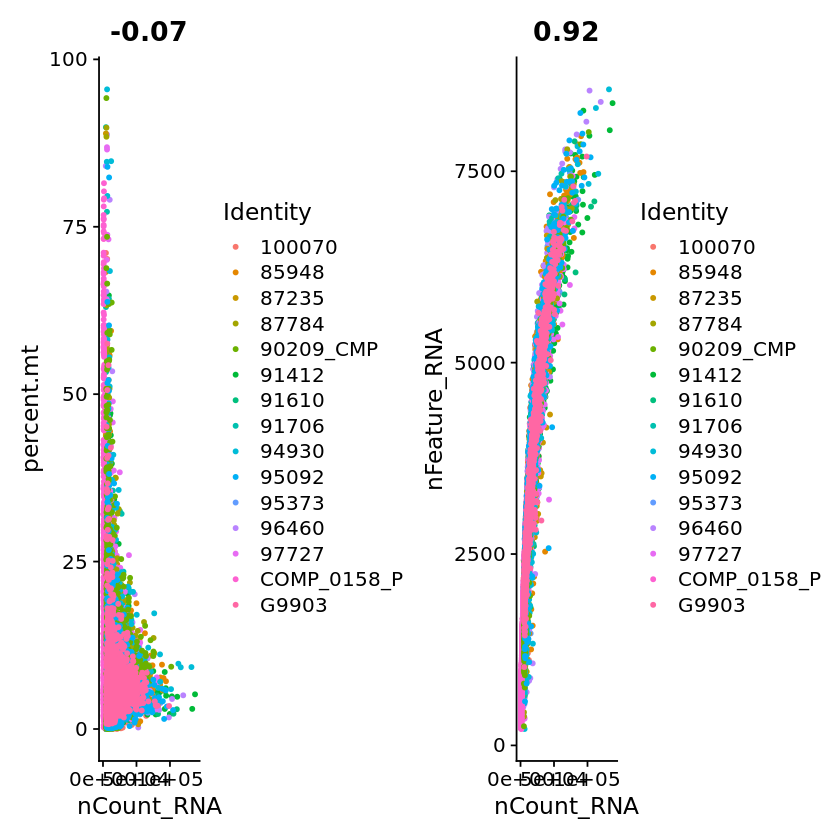

In [145]:
plot1 <- FeatureScatter(chan_seng_yue, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(chan_seng_yue, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [146]:
chan_seng_yue <- subset(chan_seng_yue, subset = nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 20)

In [147]:
data_dir = "../data/lin/GSE154778_RAW"
# samples = list.files(path = data_dir)
samples = c('P01', 'P02', 'P03', 'P04', 'P05', 'P06',
            'P07', 'P08', 'P09', 'P10')
fps = c()
for (sample in samples) {
  
  fps = c(fps, paste(data_dir, sample, sep="/"))   
  
}
fps

[1] "../data/lin/GSE154778_RAW/P01" "../data/lin/GSE154778_RAW/P02"
 [3] "../data/lin/GSE154778_RAW/P03" "../data/lin/GSE154778_RAW/P04"
 [5] "../data/lin/GSE154778_RAW/P05" "../data/lin/GSE154778_RAW/P06"
 [7] "../data/lin/GSE154778_RAW/P07" "../data/lin/GSE154778_RAW/P08"
 [9] "../data/lin/GSE154778_RAW/P09" "../data/lin/GSE154778_RAW/P10"

In [148]:
objs = c()
for (i in 1:length(fps)) {
  print(fps[[i]])
  temp.data = Read10X(data.dir = fps[[i]])
  temp = CreateSeuratObject(counts = temp.data, project = samples[[i]], min.cells = 3, min.features = 200)
  objs = c(objs, temp)
}
lin <- merge(objs[[1]], y = objs[2:length(objs)], add.cell.ids = samples, project = "lin")

[1] "../data/lin/GSE154778_RAW/P01"
[1] "../data/lin/GSE154778_RAW/P02"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P03"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P04"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P05"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P06"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P07"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P08"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P09"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/lin/GSE154778_RAW/P10"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [149]:
lin

An object of class Seurat 
22950 features across 8839 samples within 1 assay 
Active assay: RNA (22950 features, 0 variable features)

In [150]:
lin[["percent.mt"]] <- PercentageFeatureSet(lin, pattern = "^MT-")

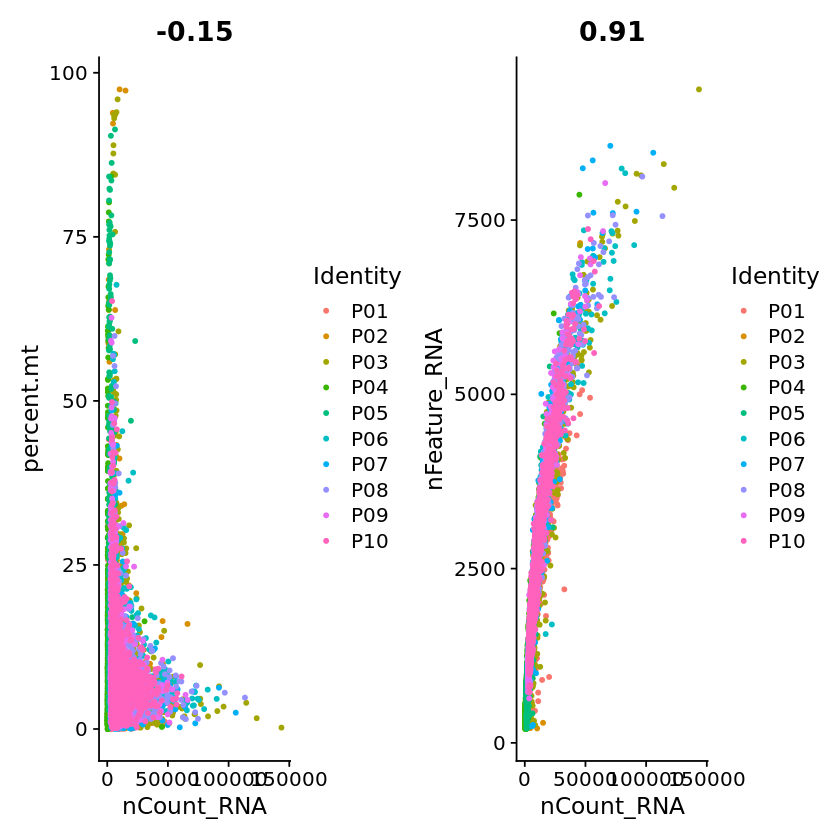

In [151]:
plot1 <- FeatureScatter(lin, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(lin, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [152]:
lin <- subset(lin, subset = nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 20)

In [153]:
counts = read.table('../data/peng/counts.tsv', sep='\t', header=TRUE, row.names=1)
transposed_counts = t(counts)
metadata =  read.table('../data/peng/metadata.tsv', sep='\t', header=TRUE, row.names=1)

In [154]:
peng = CreateSeuratObject(
  transposed_counts,
  project = "peng",
  assay = "RNA",
  names.field = "CELL",
#   names.delim = "_",
  meta.data = metadata,

)

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning me

In [155]:
peng

An object of class Seurat 
18008 features across 41986 samples within 1 assay 
Active assay: RNA (18008 features, 0 variable features)

In [161]:
peng@meta.data

orig.ident nCount_RNA nFeature_RNA CELL                
T1_AAACCTGAGATGTCGG  NA         11812      3343         T1_AAACCTGAGATGTCGG 
T1_AAACGGGGTCATGCAT  NA          1935       974         T1_AAACGGGGTCATGCAT 
T1_AAAGATGCATGTTGAC  NA          3811      1490         T1_AAAGATGCATGTTGAC 
T1_AAAGATGGTCGAGTTT  NA          2069      1101         T1_AAAGATGGTCGAGTTT 
T1_AAAGATGGTCTCTCTG  NA          8706      3189         T1_AAAGATGGTCTCTCTG 
T1_AAAGATGTCTTTACAC  NA          3624      1440         T1_AAAGATGTCTTTACAC 
T1_AAAGCAAAGTGTACCT  NA          2454      1263         T1_AAAGCAAAGTGTACCT 
T1_AAAGCAATCACTTCAT  NA          2277      1172         T1_AAAGCAATCACTTCAT 
T1_AAAGTAGAGTCGTACT  NA          2271      1319         T1_AAAGTAGAGTCGTACT 
T1_AAAGTAGCATTACGAC  NA          2036       982         T1_AAAGTAGCATTACGAC 
T1_AAATGCCAGAAACGCC  NA          6230      2253         T1_AAATGCCAGAAACGCC 
T1_AACACGTAGAAGGTGA  NA          2268       794         T1_AACACGTAGAAGGTGA 
T1_AACACGTCAATGACCT  NA          5020      1976         T1_AACACGTCAATGACCT 
T1_AACACGTGTCATATCG  NA          2772       978         T1_AACACGTGTCATATCG 
T1_AACACGTGTGCTGTAT  NA          4372      1508         T1_AACACGTGTGCTGTAT 
T1_AACCATGCACAACTGT  NA          2061      1187         T1_AACCATGCACAACTGT 
T1_AACCATGTCTGATTCT  NA          8460      3018         T1_AACCATGTCTGATTCT 
T1_AACCATGTCTGTCCGT  NA          2284      1301         T1_AACCATGTCTGTCCGT 
T1_AACCGCGGTACTCGCG  NA          6128      2256         T1_AACCGCGGTACTCGCG 
T1_AACCGCGTCGAATGGG  NA          2966      1328         T1_AACCGCGTCGAATGGG 
T1_AACGTTGCAATGGATA  NA          4994      1661         T1_AACGTTGCAATGGATA 
T1_AACGTTGGTACCCAAT  NA          2466      1227         T1_AACGTTGGTACCCAAT 
T1_AACTCAGCAGCAGTTT  NA          4525      1477         T1_AACTCAGCAGCAGTTT 
T1_AACTCAGTCGTACCGG  NA          8309      3220         T1_AACTCAGTCGTACCGG 
T1_AACTCCCCACATCTTT  NA          9363      3532         T1_AACTCCCCACATCTTT 
T1_AACTCCCCACGAAAGC  NA          2682      1105         T1_AACTCCCCACGAAAGC 
T1_AACTCTTAGGTAAACT  NA          2290      1014         T1_AACTCTTAGGTAAACT 
T1_AACTCTTAGTACCGGA  NA          2744      1296         T1_AACTCTTAGTACCGGA 
T1_AACTGGTTCTAACGGT  NA          5887      2210         T1_AACTGGTTCTAACGGT 
T1_AACTTTCAGGATTCGG  NA          5712      2564         T1_AACTTTCAGGATTCGG 
...                  ...        ...        ...          ...                 
T24_TTGGCAACAAGGCTCC NA          5515      2312         T24_TTGGCAACAAGGCTCC
T24_TTGGCAACATGGTCTA NA          6105      2440         T24_TTGGCAACATGGTCTA
T24_TTGGCAAGTCCGACGT NA          9908      2832         T24_TTGGCAAGTCCGACGT
T24_TTGGCAAGTTGATTGC NA         27889      4949         T24_TTGGCAAGTTGATTGC
T24_TTGTAGGTCAATCACG NA          3463      1511         T24_TTGTAGGTCAATCACG
T24_TTGTAGGTCCTTTCGG NA          6034      2353         T24_TTGTAGGTCCTTTCGG
T24_TTTACTGGTAGTACCT NA         12865      3593         T24_TTTACTGGTAGTACCT
T24_TTTACTGGTTAGAACA NA         24383      4926         T24_TTTACTGGTTAGAACA
T24_TTTACTGTCTCCTATA NA         19305      4095         T24_TTTACTGTCTCCTATA
T24_TTTATGCAGAAGGGTA NA          8461      2951         T24_TTTATGCAGAAGGGTA
T24_TTTATGCAGACACTAA NA          6643      2419         T24_TTTATGCAGACACTAA
T24_TTTATGCCAACTGCGC NA         18667      4636         T24_TTTATGCCAACTGCGC
T24_TTTATGCGTTATTCTC NA          7274      2305         T24_TTTATGCGTTATTCTC
T24_TTTATGCTCCGCGCAA NA          9146      3388         T24_TTTATGCTCCGCGCAA
T24_TTTATGCTCCTTTACA NA          6310      2327         T24_TTTATGCTCCTTTACA
T24_TTTCCTCCACCGGAAA NA         18816      3815         T24_TTTCCTCCACCGGAAA
T24_TTTCCTCCAGACAAGC NA         17335      4351         T24_TTTCCTCCAGACAAGC
T24_TTTGCGCCAATCGAAA NA          8876      2987         T24_TTTGCGCCAATCGAAA
T24_TTTGCGCGTACTTCTT NA          4253      1998         T24_TTTGCGCGTACTTCTT
T24_TTTGCGCGTCAGAATA NA         11943      3788         T24_TTTGCGCGTCAGAATA
T24_TTTGCGCTCCTTT

In [156]:
peng[["percent.mt"]] <- PercentageFeatureSet(peng, pattern = "^MT-")

In [165]:
options(future.globals.maxSize = 20000 * 1024^2)

In [166]:
pancreas.list <- c(pdac_eus, pdac_htan, peng, lin, chan_seng_yue)
# pancreas.list <- pancreas.list[c("pdac", "peng", "lin")]
for (i in 1:length(pancreas.list)) {
    obj = pancreas.list[[i]]
    pancreas.list[[i]] <- SCTransform(obj, verbose = FALSE)
}

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

In [167]:
pancreas.features <- SelectIntegrationFeatures(object.list = pancreas.list, nfeatures = 3000)

In [168]:
pancreas.list <- PrepSCTIntegration(object.list = pancreas.list, anchor.features = pancreas.features, 
    verbose = FALSE)

In [169]:
pancreas.anchors <- FindIntegrationAnchors(object.list = pancreas.list, normalization.method = "SCT", 
    anchor.features = pancreas.features, verbose = FALSE)
pancreas.integrated <- IntegrateData(anchorset = pancreas.anchors, normalization.method = "SCT", 
    verbose = FALSE)

Warning message:
“UNRELIABLE VALUE: Future (‘future_lapply-1’) unexpectedly generated random numbers without specifying argument 'seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'seed=NULL', or set option 'future.rng.onMisuse' to "ignore".”


In [170]:
pancreas.integrated <- RunPCA(pancreas.integrated, verbose = FALSE)
pancreas.integrated <- RunUMAP(pancreas.integrated, dims = 1:30)


18:23:08 UMAP embedding parameters a = 0.9922 b = 1.112

18:23:09 Read 135205 rows and found 30 numeric columns

18:23:09 Using Annoy for neighbor search, n_neighbors = 30

18:23:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:23:30 Writing NN index file to temp file /tmp/RtmpHp6tqp/filedc2a49b9be05

18:23:30 Searching Annoy index using 1 thread, search_k = 3000

18:24:32 Annoy recall = 100%

18:24:36 Commencing smooth kNN distance calibration using 1 thread

18:24:44 Initializing from normalized Laplacian + noise

18:25:02 Commencing optimization for 200 epochs, with 6110942 positive edges

18:28:27 Optimization finished



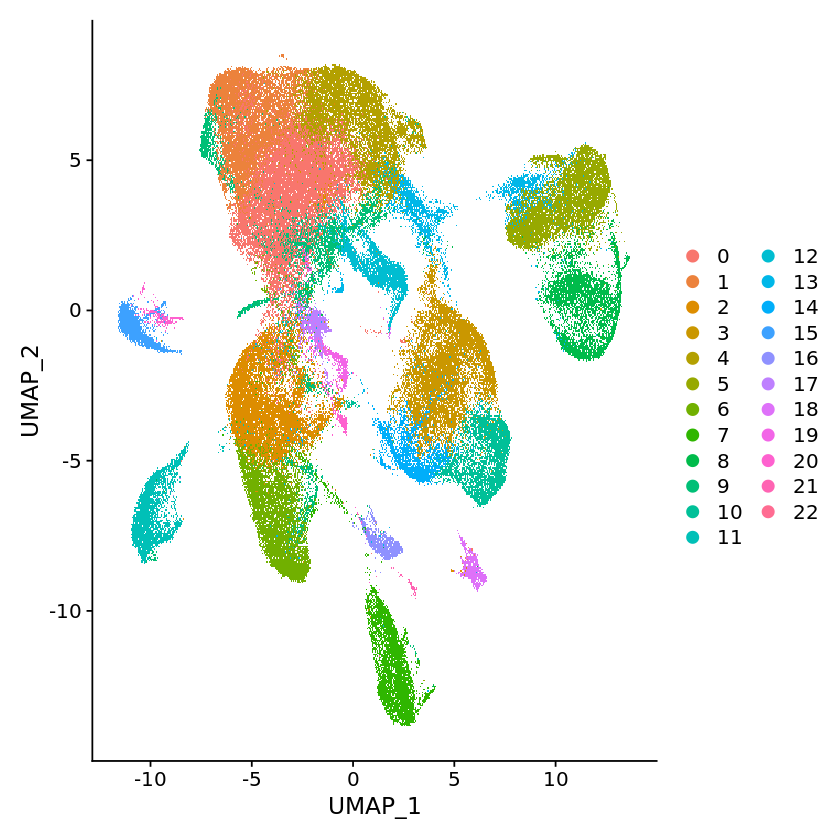

In [175]:
DimPlot(pancreas.integrated)

In [172]:
pancreas.integrated <- FindNeighbors(pancreas.integrated, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [189]:
pancreas.integrated <- FindClusters(pancreas.integrated, resolution = .75,)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 135205
Number of edges: 4797176

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 30
Elapsed time: 55 seconds


In [174]:
saveRDS(pancreas.integrated, 'backup.rds')

In [35]:
pancreas.integrated = readRDS('backup.rds')

In [32]:
pancreas.integrated

An object of class Seurat 
67074 features across 151336 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

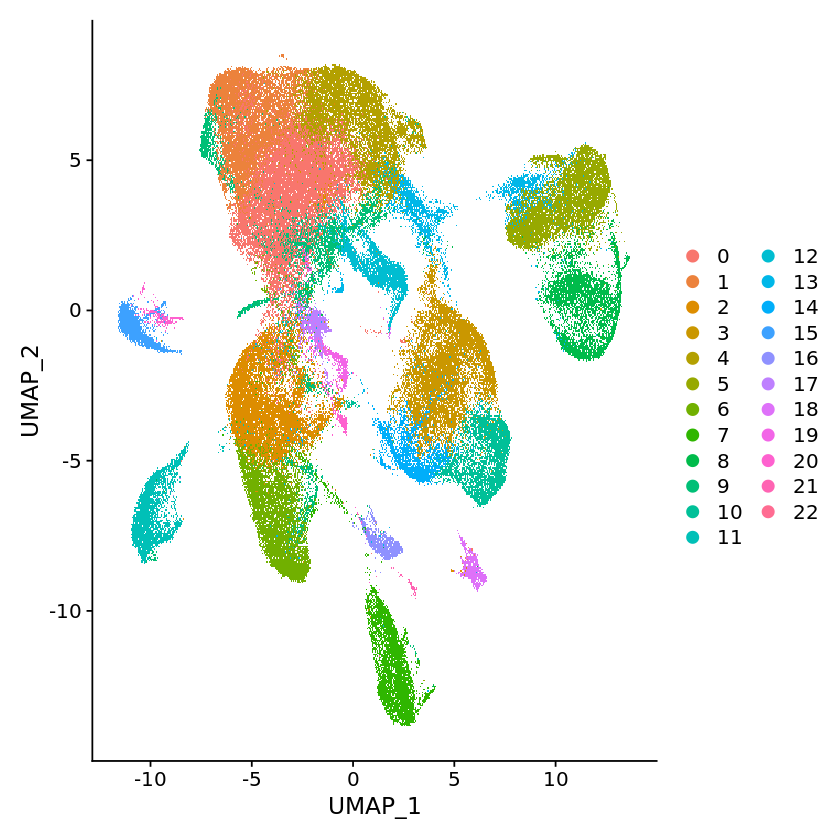

In [176]:
DimPlot(pancreas.integrated, reduction = "umap")

In [35]:
pancreas.integrated@meta.data

orig.ident nCount_RNA
wu01_AAACCTGCACATAACC-1                                  wu01       11822     
wu01_AAACCTGCACCACGTG-1                                  wu01         469     
wu01_AAACCTGTCTAACTTC-1                                  wu01         482     
wu01_AAACGGGCAAGGCTCC-1                                  wu01        1516     
wu01_AAACGGGTCATTCACT-1                                  wu01         876     
wu01_AAACGGGTCTGTGCAA-1                                  wu01        2064     
wu01_AAAGCAAAGCCACCTG-1                                  wu01         554     
wu01_AAAGTAGAGAACTGTA-1                                  wu01        4542     
wu01_AAAGTAGGTCGGGTCT-1                                  wu01        5512     
wu01_AAATGCCTCCCAGGTG-1                                  wu01       27328     
wu01_AACACGTCAAGCGATG-1                                  wu01        1268     
wu01_AACACGTTCATGTCCC-1                                  wu01        9966     
wu01_AACACGTTCCAAGTAC-1                                  wu01        6659     
wu01_AACACGTTCTGGTATG-1                                  wu01       13360     
wu01_AACCATGCACACTGCG-1                                  wu01         839     
wu01_AACCGCGAGACAGAGA-1                                  wu01        2415     
wu01_AACCGCGCAGCTCGCA-1                                  wu01         264     
wu01_AACTCAGCACAGGAGT-1                                  wu01         502     
wu01_AACTCAGGTGCACCAC-1                                  wu01         287     
wu01_AACTCCCCAACACCCG-1                                  wu01         314     
wu01_AACTCCCCAACTGGCC-1                                  wu01       10528     
wu01_AACTCCCCACGAAATA-1                                  wu01        1379     
wu01_AACTCCCGTGAGTGAC-1                                  wu01        7807     
wu01_AACTCCCTCACTATTC-1                                  wu01        1641     
wu01_AACTCCCTCAGATAAG-1                                  wu01       19261     
wu01_AACTCTTAGGATATAC-1                                  wu01       22004     
wu01_AACTCTTTCACAGTAC-1                                  wu01         983     
wu01_AACTCTTTCATGTAGC-1                                  wu01         453     
wu01_AACTGGTAGGGTGTGT-1                                  wu01         415     
wu01_AACTTTCAGGGAAACA-1                                  wu01        3667     
...                                                      ...        ...       
G9903_filtered_gene_bc_matrices_h5.h5_TTTACTGAGCCGATTT-1 G9903      15058     
G9903_filtered_gene_bc_matrices_h5.h5_TTTACTGAGTATTGGA-1 G9903       6880     
G9903_filtered_gene_bc_matrices_h5.h5_TTTACTGCAGCTGTAT-1 G9903      22947     
G9903_filtered_gene_bc_matrices_h5.h5_TTTACTGCATGAGCGA-1 G9903      19956     
G9903_filtered_gene_bc_matrices_h5.h5_TTTACTGTCAGTGCAT-1 G9903      43089     
G9903_filtered_gene_bc_matrices_h5.h5_TTTATGCCAATCACAC-1 G9903      13278     
G9903_filtered_gene_bc_matrices_h5.h5_TTTATGCCATGACATC-1 G9903      19914     
G9903_filtered_gene_bc_matrices_h5.h5_TTTATGCGTCTTGATG-1 G9903       8649     
G9903_filtered_gene_bc_matrices_h5.h5_TTTCCTCAGATCCTGT-1 G9903       5865     
G9903_filtered_gene_bc_matrices_h5.h5_TTTCCTCCACACATGT-1 G9903       9753     
G9903_filtered_gene_bc_matrices_h5.h5_TTTCCTCCATTCGACA-1 G9903      42587     
G9903_filtered_gene_bc_matrices_h5.h5_TTTCCTCGTCTTTCAT-1 G9903       6226     
G9903_filtered_gene_bc_matrices_h5.h5_TTTCCTCTCAGCACAT-1 G9903      11908     
G9903_filtered_gene_bc_matrices_h5.h5_TTTCCTCTCCCAAGTA-1 G9903      31588     
G9903_filtered_gene_bc_matrices_h5.h5_TTTGCGCAGAGTAAGG-1 G9903      11427     
G9903_filtered_gene_bc_matrices_h5.h5_TTTGCGCAGCGGCTTC-1 G9903       7917     
G9903_filtered_gene_bc_matrices_h5.h5_TTTGCGCCACAGGAGT-1 G9903      13837     
G9903_filtered_gene_bc_matrices_h5.h5_TTTGCGCGTACCGTAT-1 G9903      22240     
G9903_filtered_gene_bc_matrices_h5.h5_TTTGCGCGTGCAACTT-1 G9903       7509     
G9903_filtered_gene_bc_matri

In [201]:
# new_names = c('Malignant','Monocyte','Monocyte','Monocyte','CAF','CD4 T','CD4 T','Malignant','DC','CD8 T','CD4 T',
#               'Malignant','CD4 T','B cell','Malignant','Monocyte','CD8 T','Monocyte','Plasma','Malignant','CAF',
#               'Erythrocyte','Malignant','NK','Malignant','CD8 T','Plasma',
#               'Treg','Endothelial','Malignant','Malignant',
#               'Erythrocyte','Malignant','Erythrocyte','Malignant','Malignant','Malignant','Acinar','B cell','Mast',
#               'B cell','Malignant',
#               'Malignant','Plasma','B cell','Malignant','Malignant','CAF','Malignant','B cell','Malignant',
#               'Malignant')
# new_names = c('0',' 1', '2', '3', '4',
#               '5',' 6', '7', '8', '9',
#               '10','11', '12', '13', '14',
#               '15',' 16', '17', '18', '19',
#              '20','21', '22', '23', '24',
#               '25','26', '27', '28', '29',
#              '30','31', '32', '33', '34',
#               '35','36', '37', '38', '39',
#              '40','41', '42', '43', '44',
#               '45','46', '47', '48', '49',
#              '50','51', '52', '53', '54',
#               '55','56', '57', '58', '59',
#              '60','61', '62', '63', '64',
#              )
new_names = c('Malignant','Malignant', 'immune', 'immune', 'Malignant',
              'Malignant','Malignant', 'Monocyte', 'Endothelial', 'Monocyte',
              'CAF','Monocyte', 'Malignant', 'CAF', 'Stellate',
              'immune', 'Malignant', 'B cell', 'CAF', 'Endocrine',
             'DC','immune', 'immune', 'immune', 'Mast',
              'Acinar','immune', 'Endothelial', 'Malignant', 'Malignant'
             )
# print(length(new_names))
names(new_names) <- levels(pancreas.integrated)

pancreas.integrated <- RenameIdents(pancreas.integrated, new_names)
# names(new_names) <- levels(pdac)
# AddMetaData(pdac, new_names, col.name = 'cell_type')

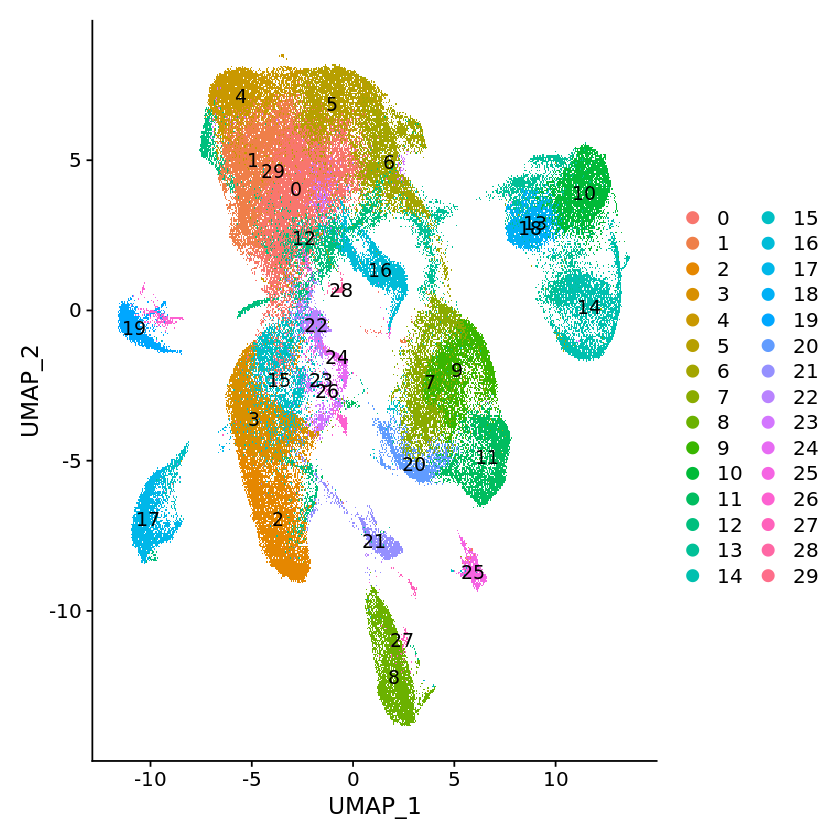

In [191]:
DimPlot(pancreas.integrated, reduction = "umap", label=TRUE)

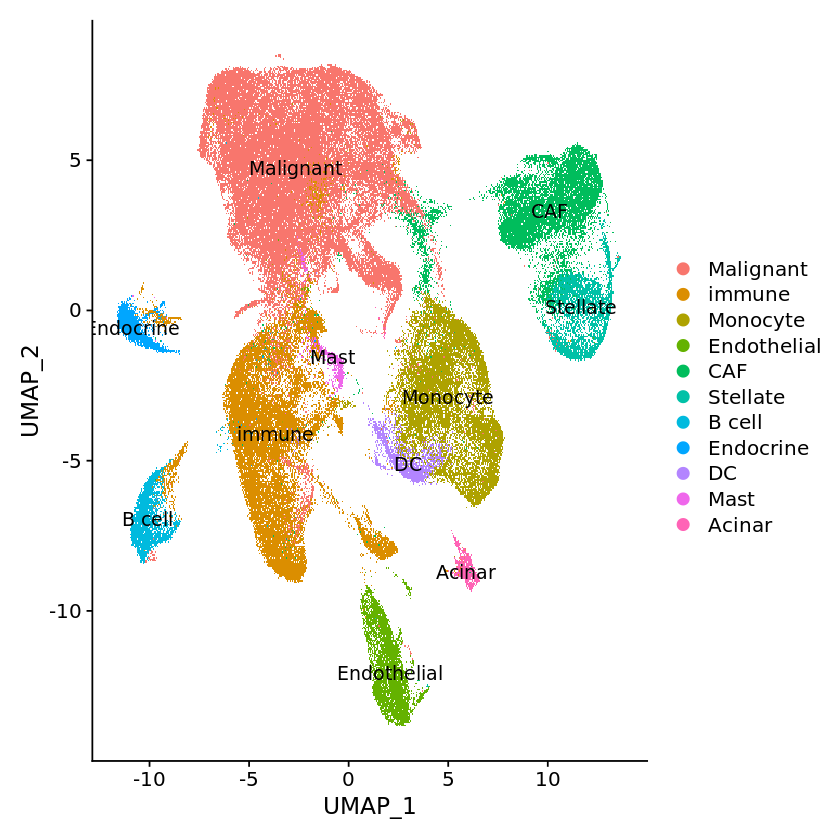

In [202]:
DimPlot(pancreas.integrated, reduction = "umap", label=TRUE)

In [ ]:
FeaturePlot(pancreas.integrated, features = c("seurat_clusters"))

In [ ]:
pancreas.integrated@meta.data

In [ ]:
head(unname(pdac@active.ident))

In [ ]:
pdac = AddMetaData(pdac, c(pdac@meta.data$orig.ident), col.name = 'sample_id')
pdac = AddMetaData(pdac, unname(pdac@active.ident), col.name = 'cell_type')

In [ ]:
DimPlot(pancreas.integrated, reduction = "umap")

In [203]:
saveRDS(pancreas.integrated, '../data/combined/all_initial.rds')

In [ ]:
cluster1.markers <- FindMarkers(pancreas.integrated, ident.1 = 44, min.pct = 0.25)
head(cluster1.markers, n = 5)

In [ ]:
pancreas.integrated

In [ ]:
T cells

CD4: CD3G+, CD4+, IL7R+
CD8 - activated: CD3G+, CD8+, GZMA+
CD8 - exausted: CD3G+, LAG3+, PDCD1+
Treg: CD3G+, FOXP3+
NK: NKG7+, NCAM1+, GNLY+

CAF: FAP+, SPARC+
Endothelial: PECAM1+
Stellate: RGS5
Monocyte: CD14, FCGR3A, LYZ
Plasma: SDC1
B cell: MS4A1
Tumor: EPCAM, KRT18, MUC5AC
Erythrocyte: HBA1
Mast: KIT, C
Endocrine CHGB
Acinar: PRSS1, CDH5

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final dataframe: ENPP3”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: ENPP3”


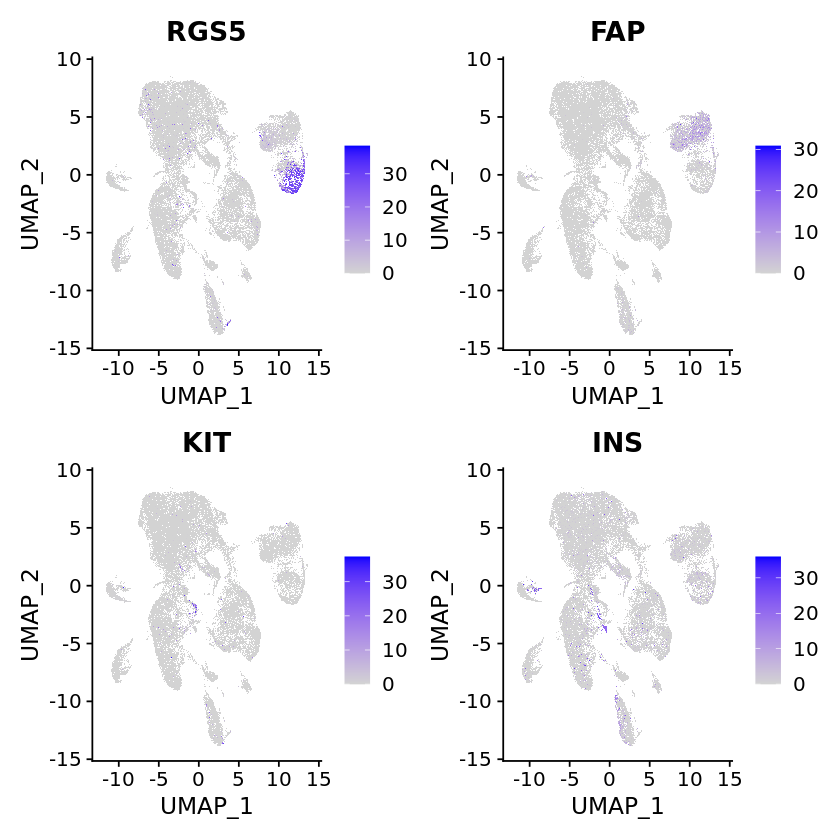

In [200]:
FeaturePlot(pancreas.integrated, features = c("RGS5", "FAP", "KIT", "INS", "ENPP3"), min.cutoff = 0)

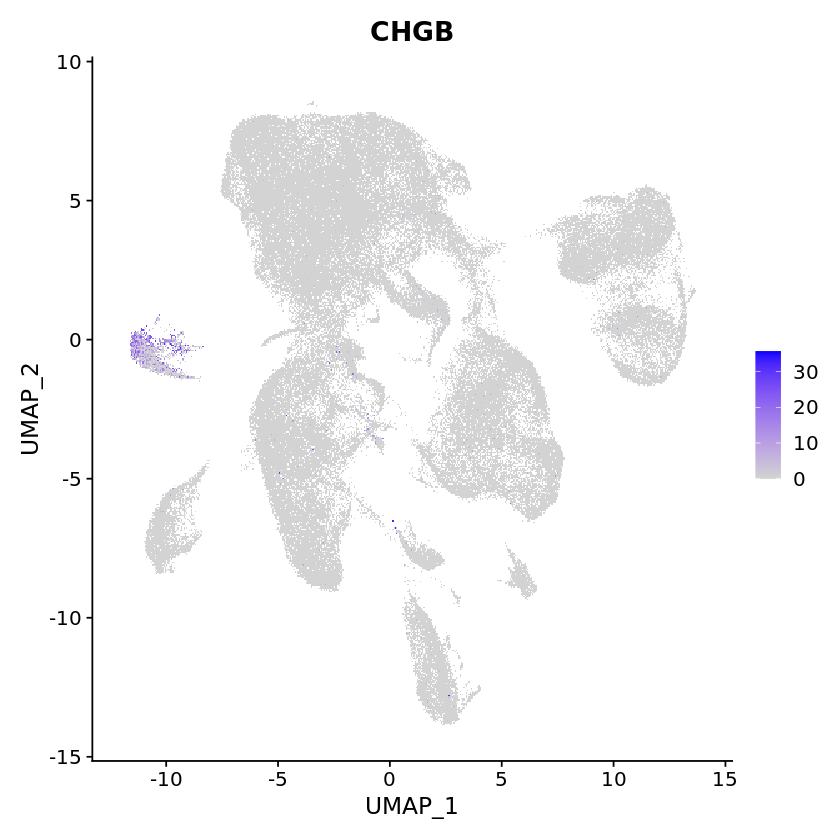

In [179]:
FeaturePlot(pancreas.integrated, features = c("CHGB"), min.cutoff = 0)

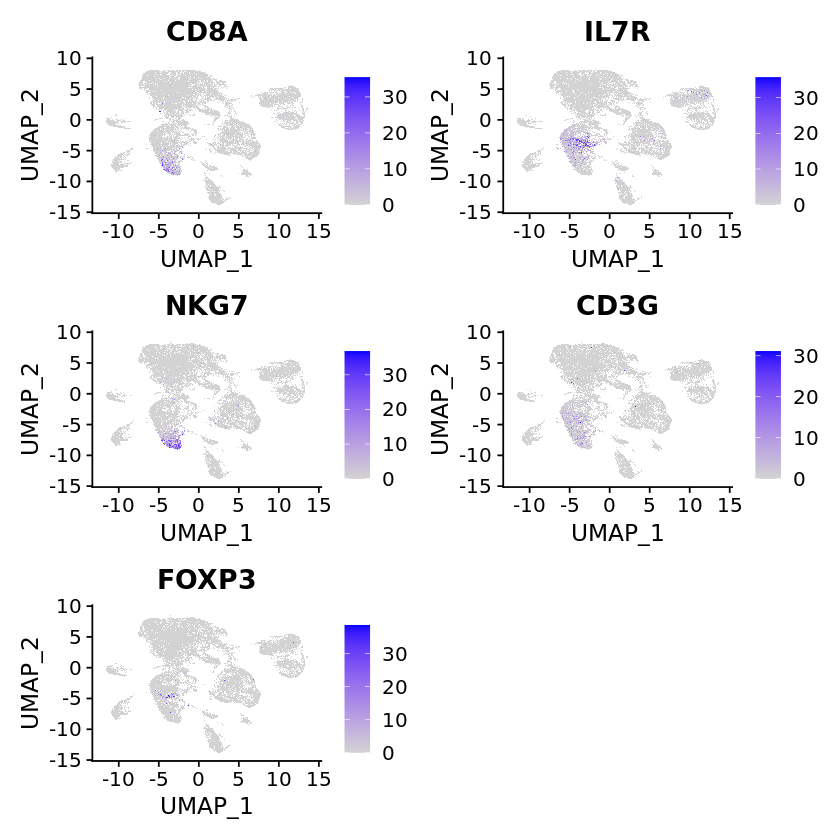

In [180]:
FeaturePlot(pancreas.integrated, features = c("CD8A", "IL7R", "NKG7", "CD3G", "FOXP3"), min.cutoff = 0)

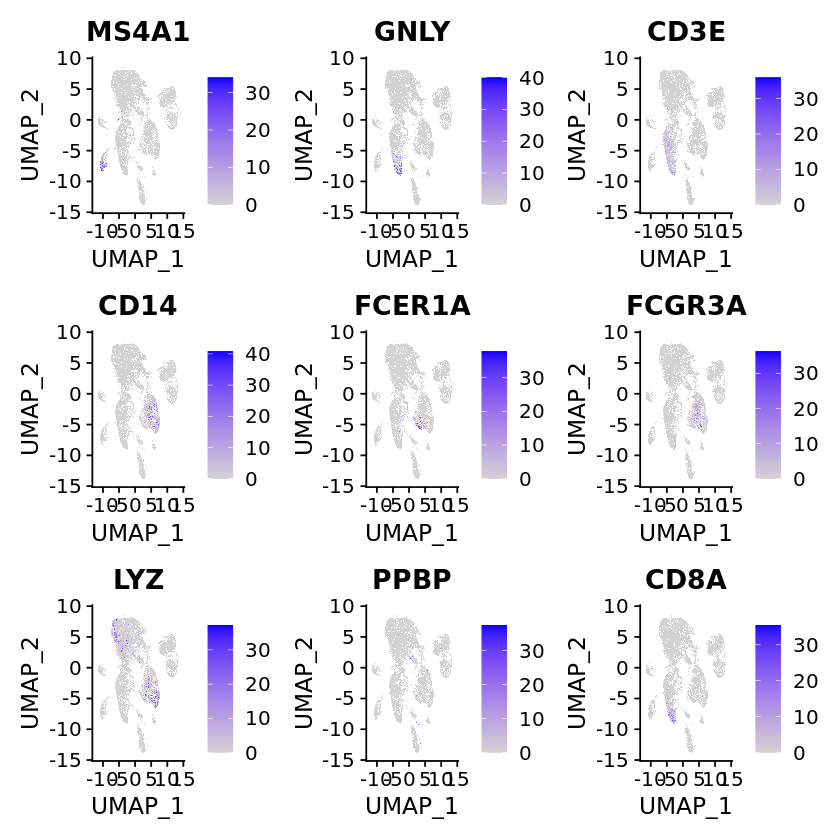

In [181]:
FeaturePlot(pancreas.integrated, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP", 
    "CD8A"), min.cutoff=0)

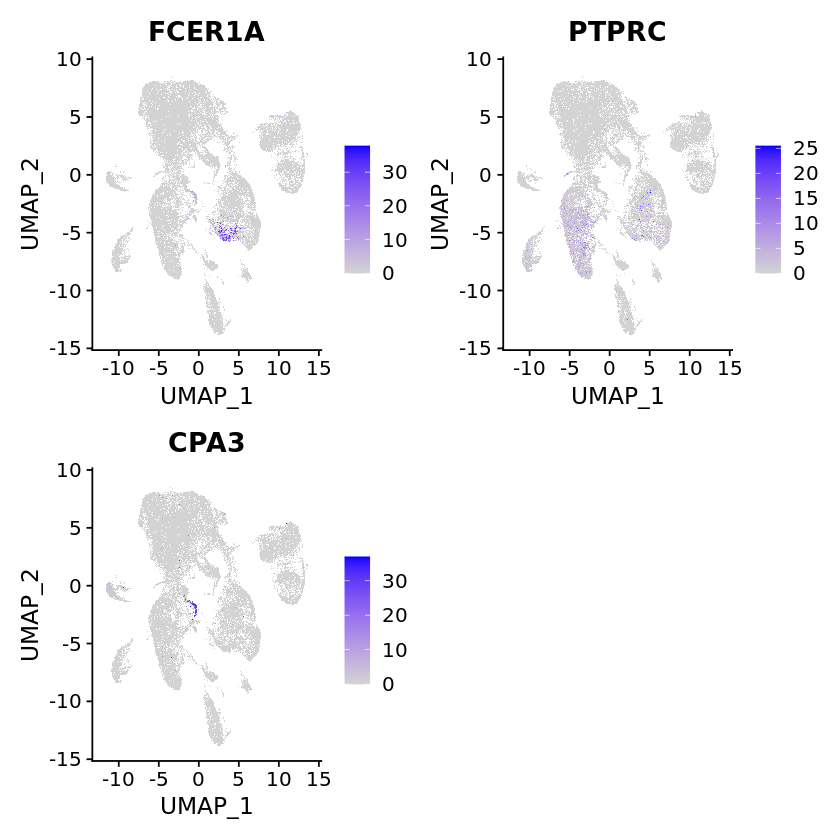

In [186]:
FeaturePlot(pancreas.integrated, features = c("FCER1A", "PTPRC", "CPA3"), min.cutoff=0)

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final dataframe: PECAM1, CXCL8”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: PECAM1, CXCL8”


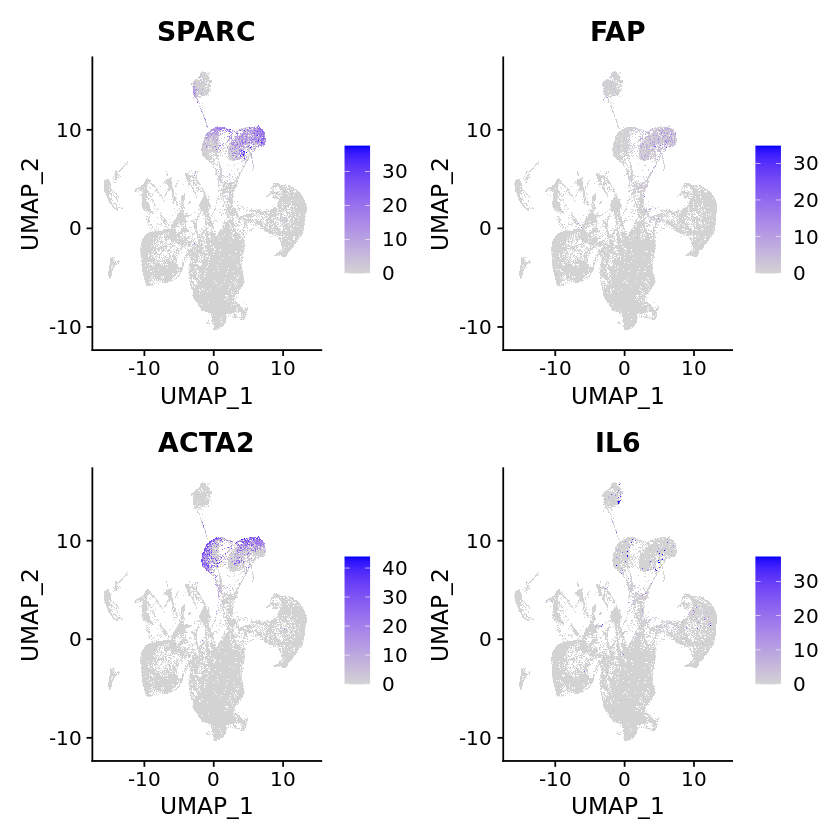

In [64]:
FeaturePlot(pancreas.integrated, features = c("PECAM1", "SPARC", "FAP", "CXCL8", "ACTA2", 'IL6'), min.cutoff=0)

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final dataframe: IGHM, HBD”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: IGHM, HBD”


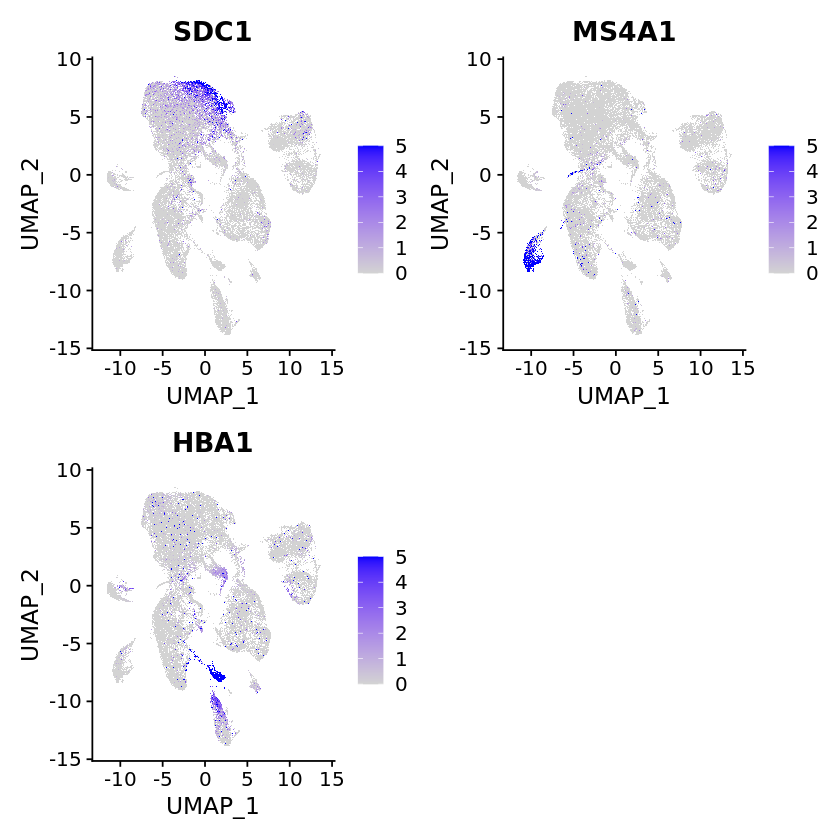

In [192]:
FeaturePlot(pancreas.integrated, features = c("SDC1", "MS4A1", 'IGHM', 'HBD', 'HBA1'), min.cutoff=0, max.cutoff = 5.)

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final dataframe: PECAM1”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: PECAM1”


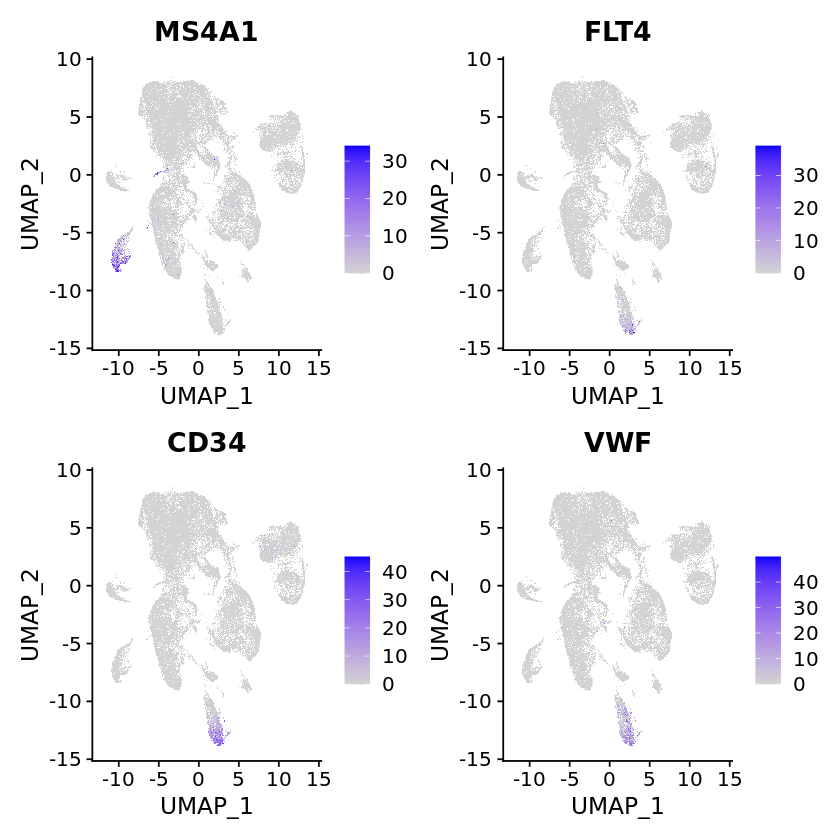

In [197]:
FeaturePlot(pancreas.integrated, features = c("PECAM1", "MS4A1", 'FLT4', 'CD34', 'VWF'), min.cutoff=0)

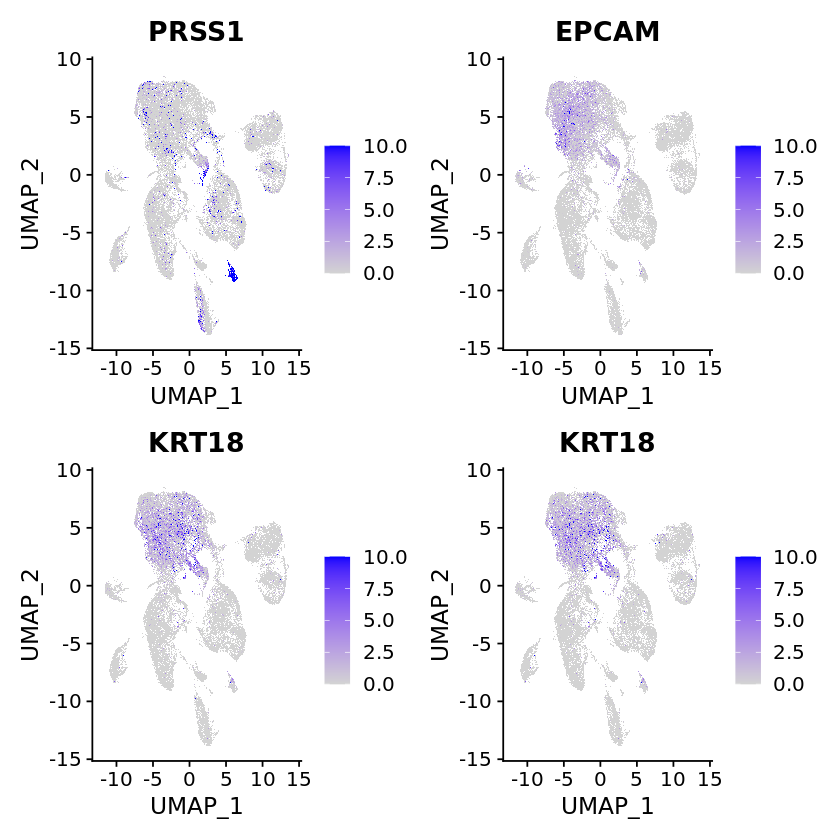

In [193]:
FeaturePlot(pancreas.integrated, features = c("PRSS1", "EPCAM", "KRT18", "KRT18"), min.cutoff=0, max.cutoff = 10.)

###### temp fix for the misnamed cell types

In [105]:
obj = readRDS('../data/combined/all_initial.rds')
obj

An object of class Seurat 
67074 features across 151336 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

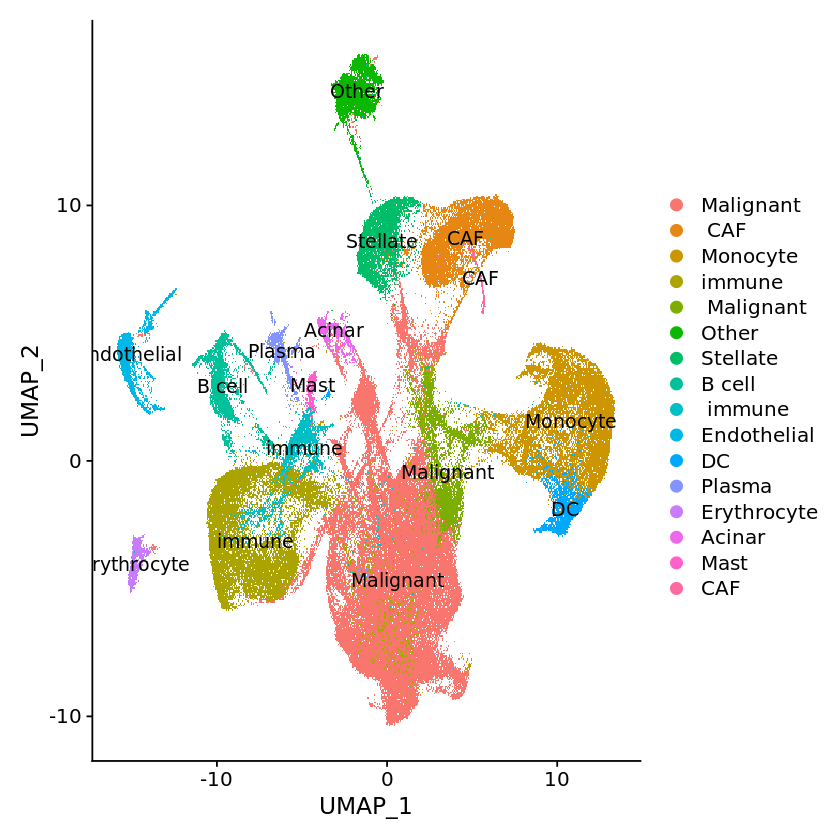

In [106]:
DimPlot(obj, reduction = "umap", label=TRUE)

In [107]:
obj = subset(obj, idents = c("Malignant", " Malignant"))
obj

An object of class Seurat 
67074 features across 67347 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

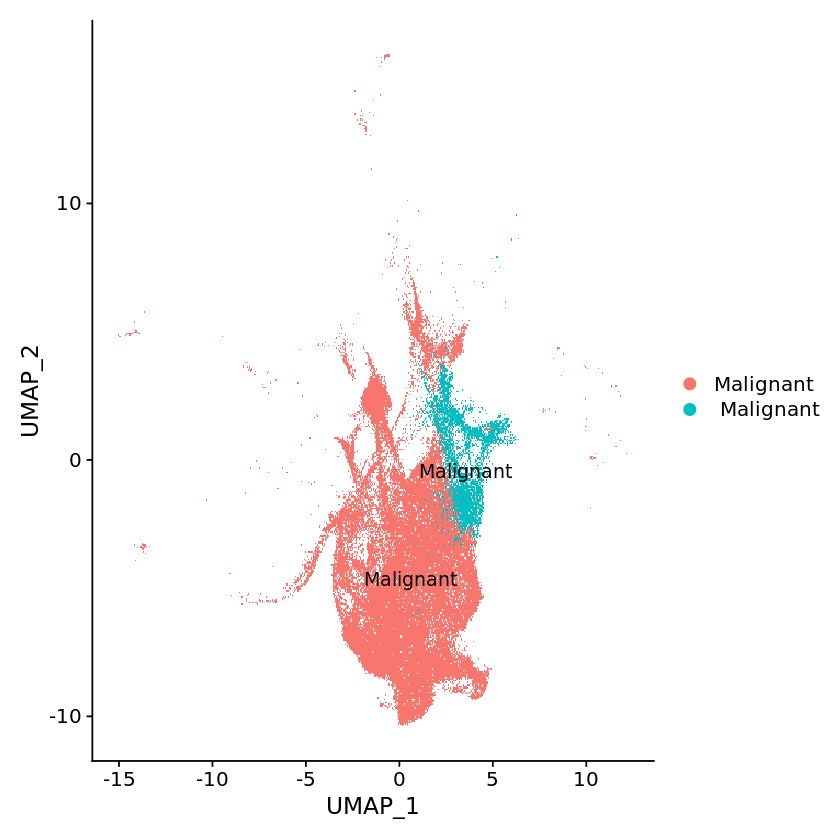

In [108]:
DimPlot(obj, reduction = "umap", label=TRUE)

In [109]:
obj <- RunPCA(obj, verbose = FALSE)
obj <- RunUMAP(obj, dims = 1:30)
obj <- FindNeighbors(obj, dims = 1:30)

15:16:19 UMAP embedding parameters a = 0.9922 b = 1.112

15:16:19 Read 67347 rows and found 30 numeric columns

15:16:19 Using Annoy for neighbor search, n_neighbors = 30

15:16:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:16:28 Writing NN index file to temp file /tmp/RtmpHp6tqp/filedc2a1eacaa82

15:16:28 Searching Annoy index using 1 thread, search_k = 3000

15:16:54 Annoy recall = 100%

15:16:55 Commencing smooth kNN distance calibration using 1 thread

15:16:59 Initializing from normalized Laplacian + noise

15:17:04 Commencing optimization for 200 epochs, with 2988016 positive edges

15:18:42 Optimization finished

Computing nearest neighbor graph

Computing SNN



In [110]:
obj <- FindClusters(obj, resolution = .05,)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 67347
Number of edges: 2430698

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9623
Number of communities: 3
Elapsed time: 17 seconds


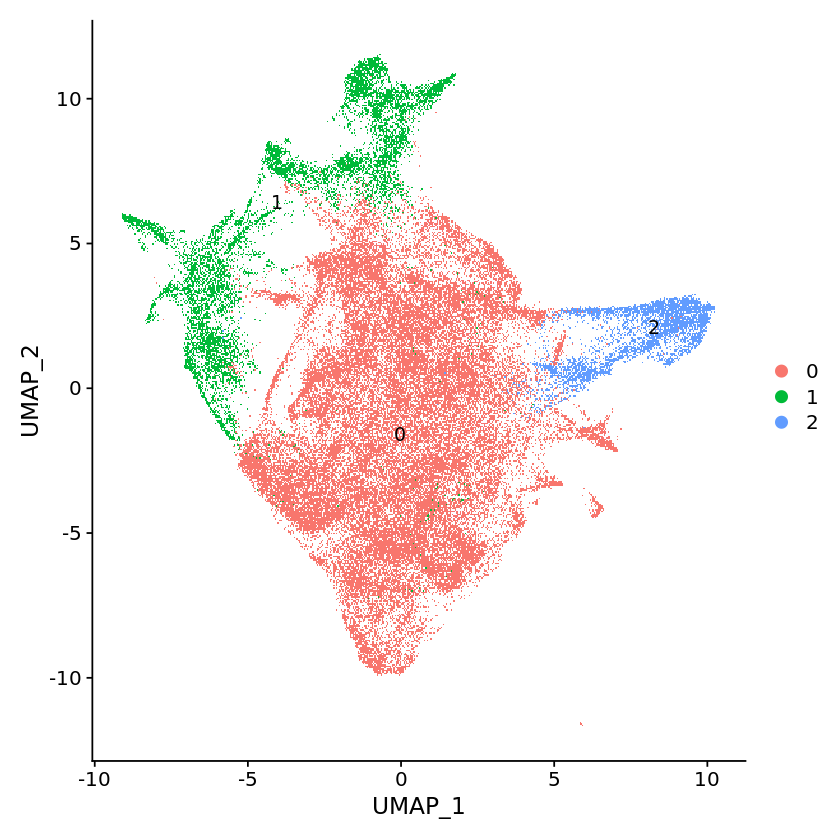

In [111]:
DimPlot(obj, reduction = "umap", label=TRUE)

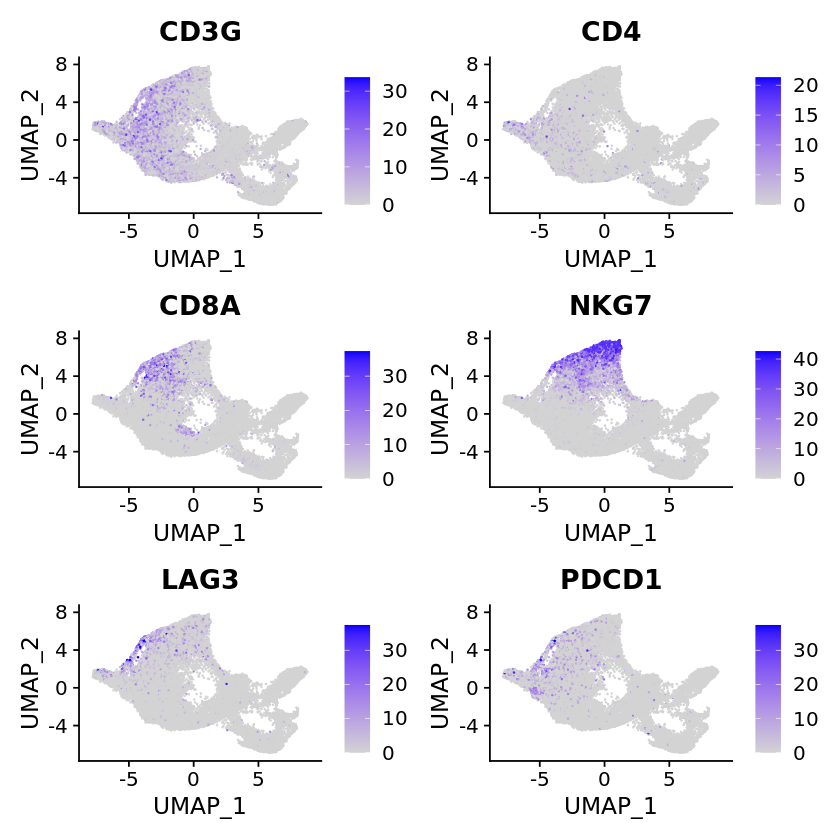

In [98]:
FeaturePlot(obj, features = c('CD3G', 'CD4', 'CD8A', 'NKG7', 'LAG3', 'PDCD1'), min.cutoff=0)

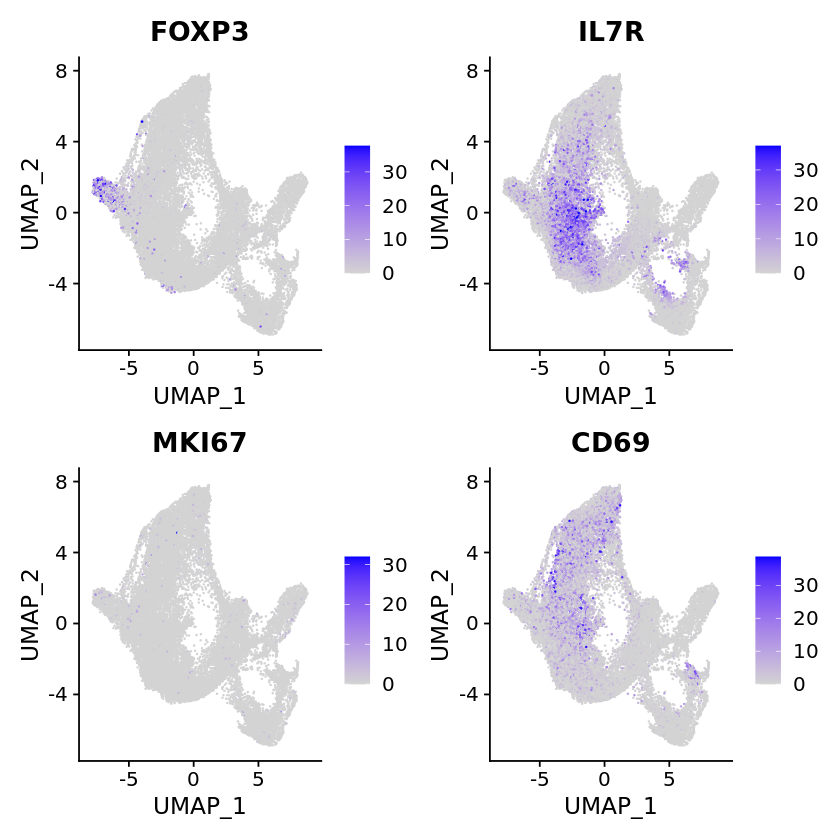

In [102]:
FeaturePlot(obj, features = c('FOXP3', 'IL7R', 'MKI67', 'CD69'), min.cutoff=0)

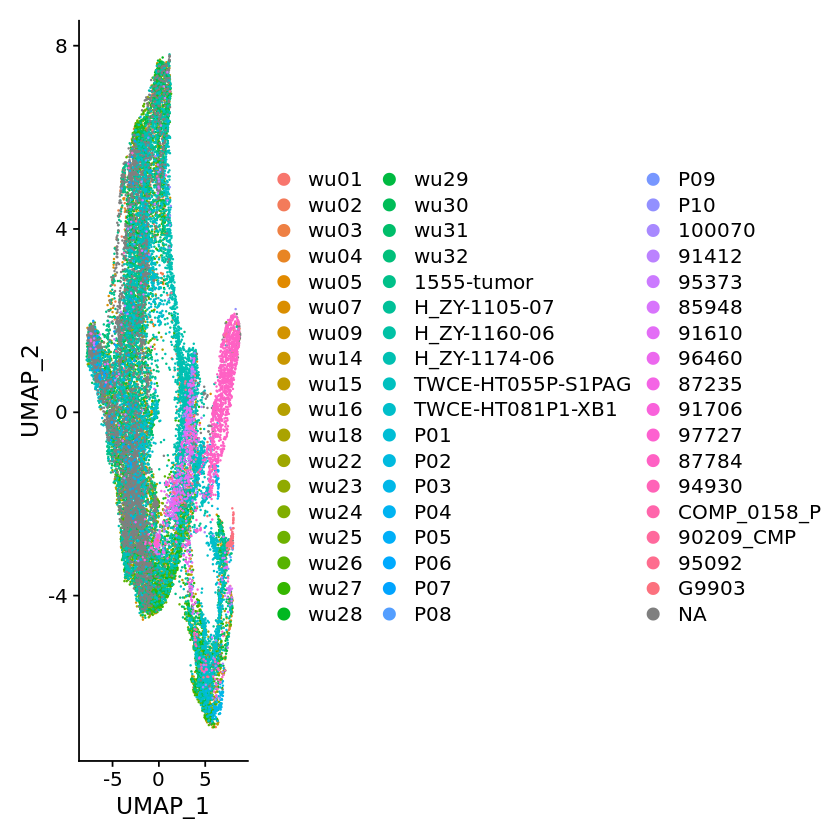

In [103]:
Idents(obj) <- "orig.ident"
DimPlot(obj, reduction = "umap", label=FALSE)

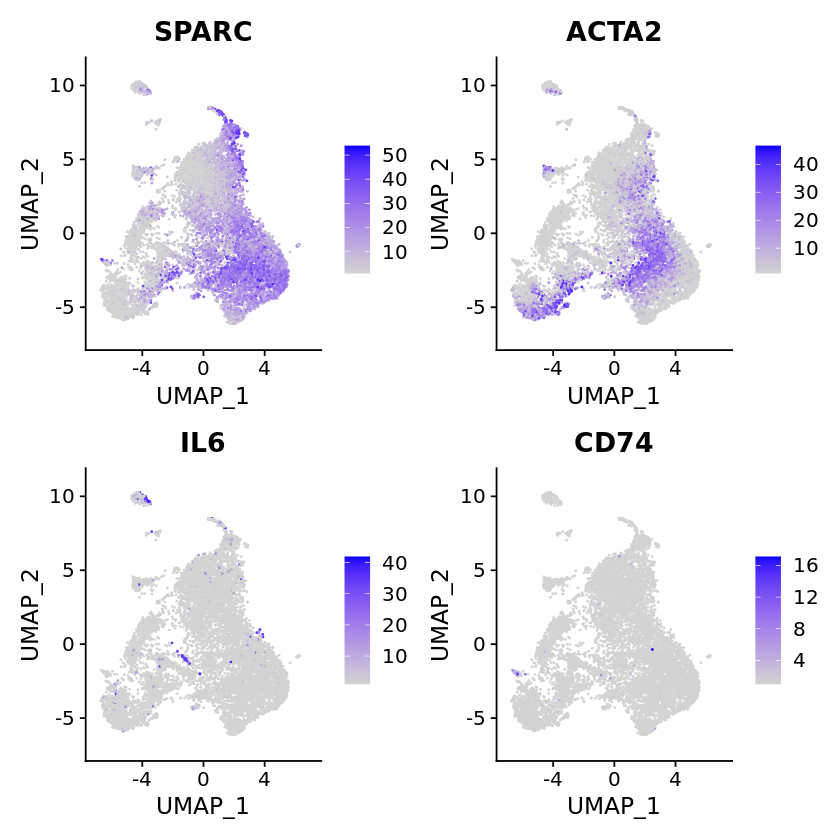

In [79]:
FeaturePlot(obj, features = c("SPARC", 'ACTA2', 'IL6', 'CD74'), min.cutoff = 1)

In [104]:
saveRDS(obj, '../data/combined/all_initial_immune.rds')

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

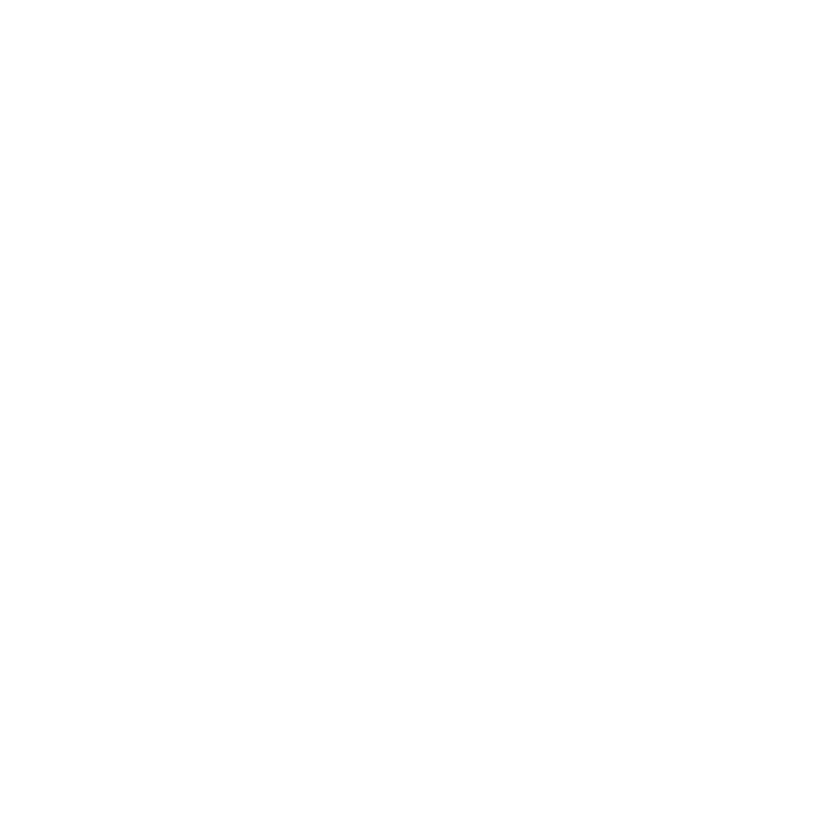

In [18]:
FeaturePlot(obj, features = c("orig.ident"))

In [ ]:
obj$orig.ident

In [93]:
pancreas.integrated@assays$RNA@counts

ERROR: Error in type(pancreas.integrated@assays$RNA@counts): could not find function "type"


#### recluster tumor

In [ ]:
obj = saveRDS(pancreas.integrated, '../data/inhouse_peng_lin.rds')
obj = subset(obj, idents = c("NK", "B"))

## combine with peng

In [ ]:
pdac = readRDS('../data/pdac/processed.rds')
pdac

In [ ]:
counts = read.table('../data/peng/counts.tsv', sep='\t', header=TRUE, row.names=1)
transposed_counts = t(counts)
metadata =  read.table('../data/peng/metadata.tsv', sep='\t', header=TRUE, row.names=1)

In [ ]:
head(metadata)

In [ ]:
head(transposed_counts)

In [ ]:
peng = CreateSeuratObject(
  transposed_counts,
  project = "peng",
  assay = "RNA",
  names.field = "CELL",
#   names.delim = "_",
  meta.data = metadata,

)

In [ ]:
peng

In [ ]:
a = GetAssayData(object=peng, assay = "RNA", slot = "counts")

In [ ]:
peng@meta.data$orig.ident = peng@meta.data$Patient

In [ ]:
Idents(object=peng) <- "Cell_type"

In [ ]:
head(peng@meta.data)

In [ ]:
head(peng@assays$RNA@)

In [ ]:
peng[["percent.mt"]] <- PercentageFeatureSet(peng, pattern = "^MT-")

In [ ]:
plot1 <- FeatureScatter(peng, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(peng, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [ ]:
peng <- SCTransform(peng, vars.to.regress = "percent.mt", verbose = FALSE)

In [ ]:
peng

In [ ]:
pdac

In [ ]:
peng <- RunPCA(peng, features = VariableFeatures(object = peng))
peng <- FindNeighbors(peng, dims = 1:40)
peng <- RunUMAP(peng, dims = 1:40)

In [ ]:
DimPlot(peng, reduction = "umap", group.by = 'Cell_type')

In [ ]:
# ## downsample pdac to try and get a better runtime
# object.downsample <- subset(pdac, downsample = 500)
# object.downsample

In [ ]:
# DimPlot(object.downsample)

In [ ]:
pancreas.features <- SelectIntegrationFeatures(object.list = pancreas.list, nfeatures = 3000)
pancreas.list <- PrepSCTIntegration(object.list = pancreas.list, anchor.features = pancreas.features, 
    verbose = FALSE)

In [ ]:
anchors <- FindTransferAnchors(reference.neighbors = 5,
  reference = pdac,
  query = peng,
  normalization.method = "SCT",
  reference.reduction = "pca",
  dims = 1:20,

  verbose = TRUE
)

In [ ]:
peng <- MapQuery(
  anchorset = anchors,
  query = peng,
  reference = object.downsample,
  refdata = list(
    cell_type = "cell_type"
  ),
  reference.reduction = "pca", 
  reduction.model = "umap",
  verbose = TRUE
)